In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv(r'C:\Users\A3MAX SOFTWARE TECH\A VS CODE\11. CAPSTONE PROJECT_DEPLOYMENT\UBER PRICE ANALYSIS\UBER_ RAW DATA.csv')

df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [41]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [42]:
df=df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [43]:
df.to_csv('preprocessed_uber_data.csv', index=False)

In [44]:
df.shape

(200000, 6)

In [45]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [46]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [47]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [48]:
# missing values in 'dropoff_longitude' & 'dropoff_latitude'

df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [49]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [50]:
# Haversine formula to calculate distance
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles.
    return c * r


In [51]:
# Calculate distance for each row
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

#EDA(Exploratory data analysis)

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

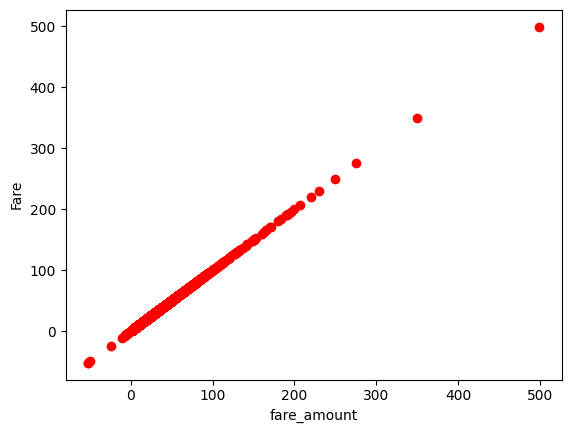

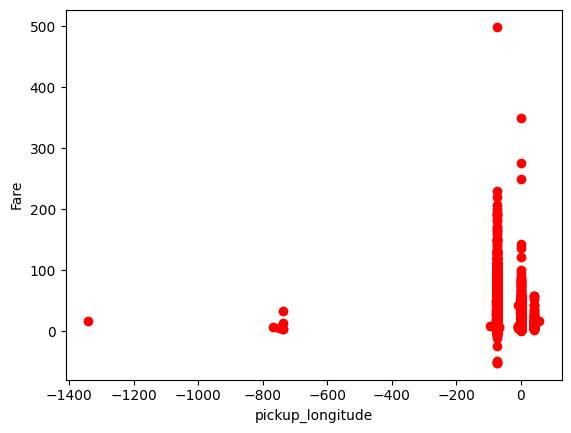

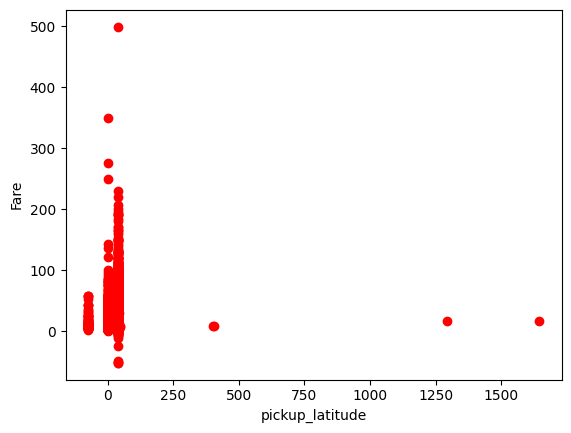

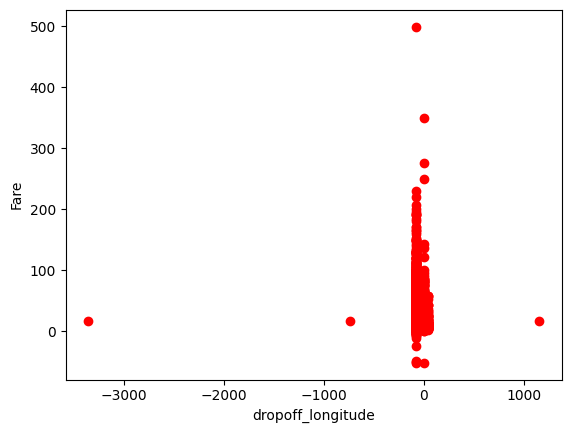

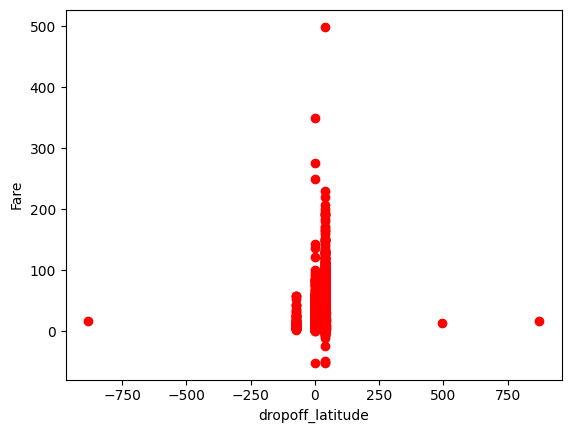

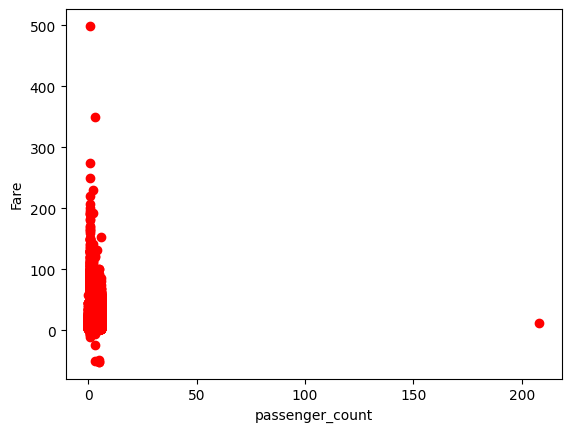

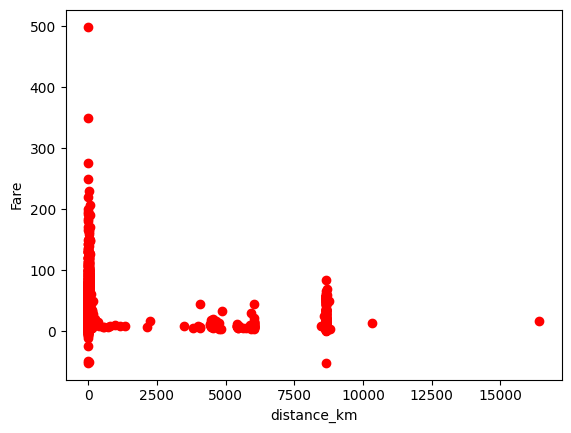

In [53]:
for i in df.columns:
    plt.xlabel(i)
    plt.ylabel("Fare")
    plt.scatter(df[i],df["fare_amount"],color='red')
    plt.show()

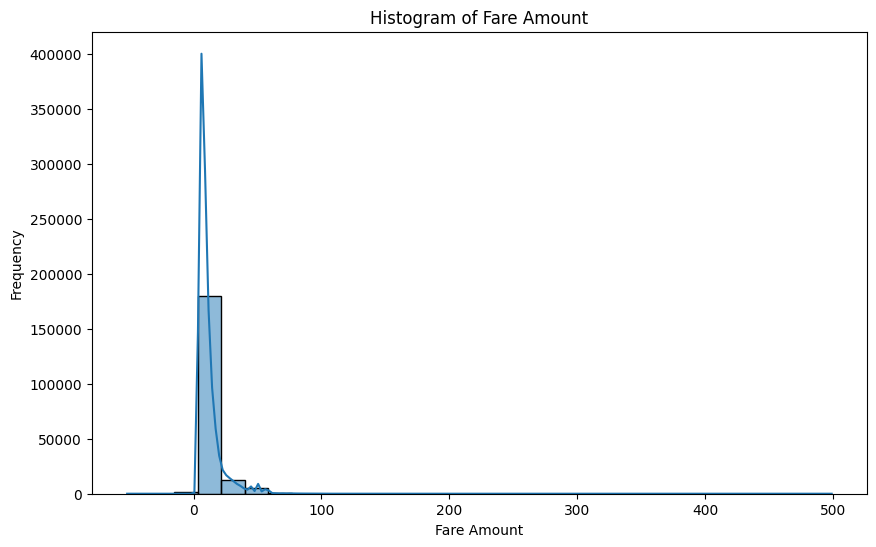

In [54]:
# Histogram of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

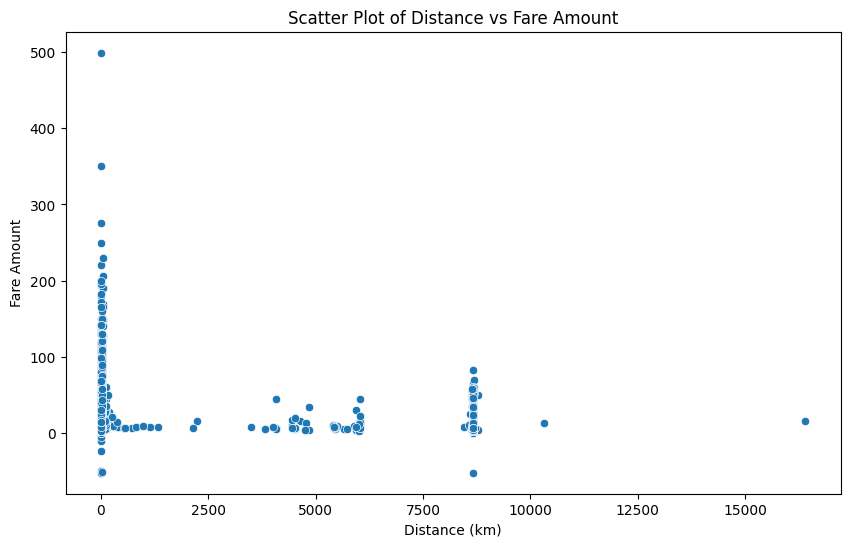

In [55]:
# Scatter plot of distance vs fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df)
plt.title('Scatter Plot of Distance vs Fare Amount')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.show()

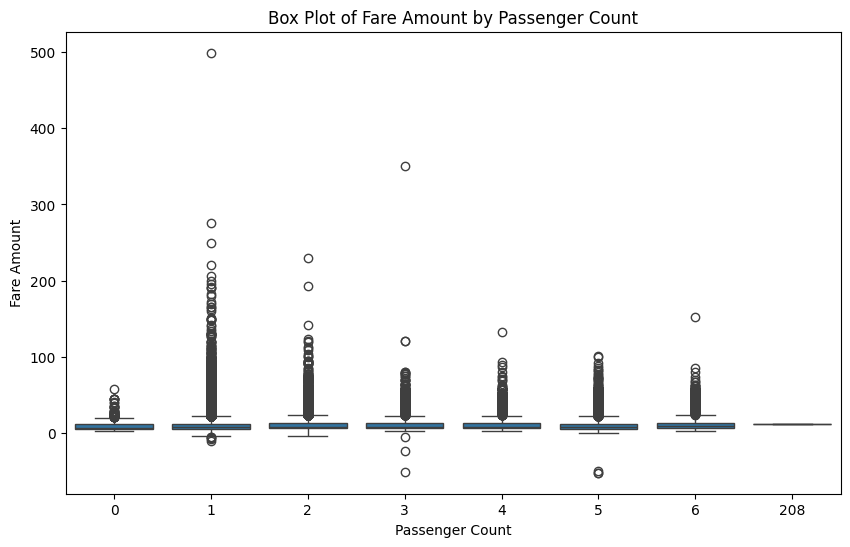

In [56]:
# Box plot of fare_amount by passenger_count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Box Plot of Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

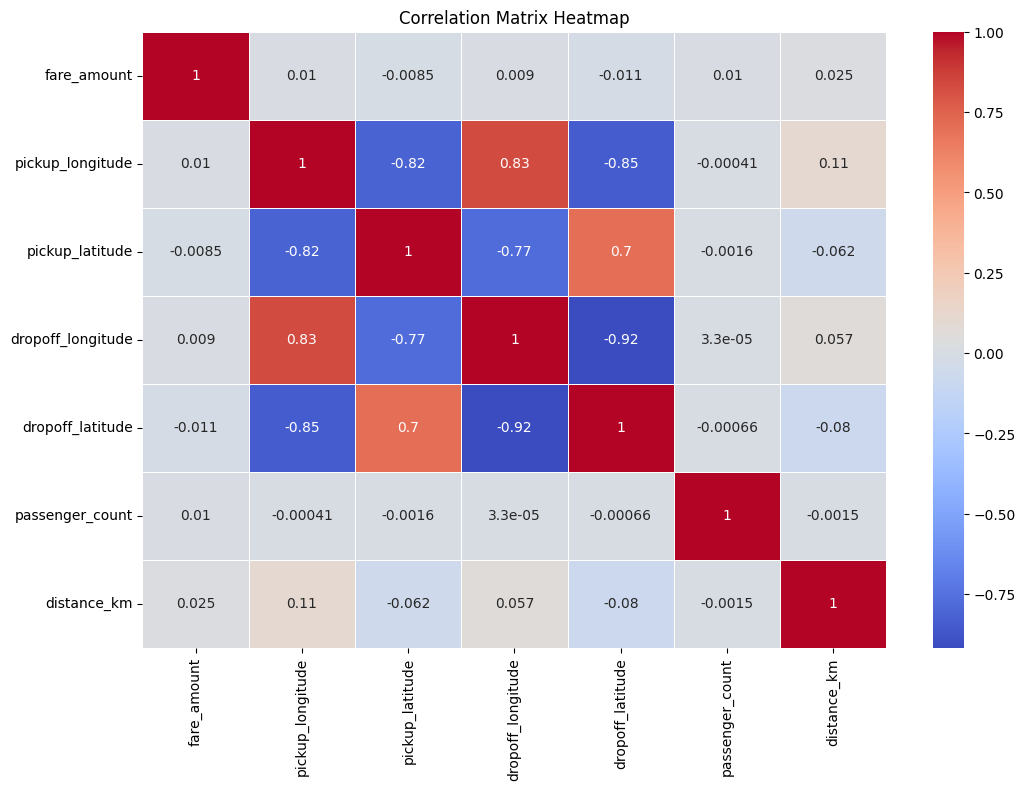

In [57]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [58]:
# Pair plot
#sns.pairplot(df[['fare_amount', 'pickup_longitude', 'pickup_latitude',
#                 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km']])
#plt.suptitle('Pair Plot', y=1.02)
#plt.show()

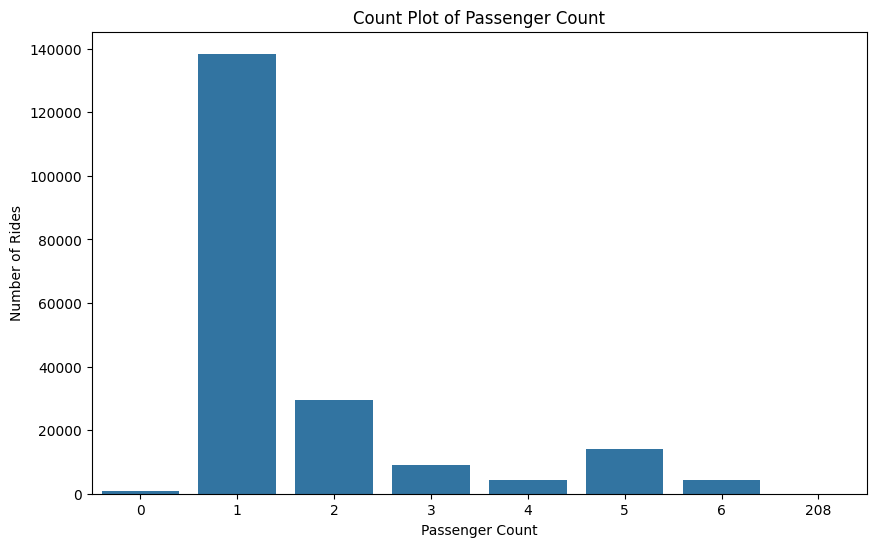

In [59]:
# Count plot of passenger_count
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=df)
plt.title('Count Plot of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Rides')
plt.show()

#Outlier Detection and Removal Code

In [60]:
features = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km']

In [61]:
# Calculate IQR for each feature
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR)))

In [62]:
outliers

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,True,False,False,True,False,False,True
199998,False,False,False,False,False,False,False


In [63]:
df = df[~outliers.any(axis=1)]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,1.122878
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [64]:
# splitting x(inputs) and y(outputs)

X=df.drop(['fare_amount'],axis=1)
Y=df["fare_amount"]
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
5,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1,1.122878
199995,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199998,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


# Implementing Training and Testing

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(X_train)

X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [67]:
# Display the sizes of the resulting datasets
print("Training set size (X_train):", X_train.shape)
print("Training set size (Y_train):", Y_train.shape)
print("Testing set size (X_test):", X_test.shape)
print("Testing set size (Y_test):", Y_test.shape)

Training set size (X_train): (119780, 6)
Training set size (Y_train): (119780,)
Testing set size (X_test): (29946, 6)
Testing set size (Y_test): (29946,)


In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=0),
    'AdaBoost': AdaBoostRegressor(random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=0),
    'XGBoost': XGBRegressor(random_state=0)
}

In [74]:
# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

In [76]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)

print(results_df)

                   Model        MSE       MAE        R2
0      Linear Regression   5.143903  1.629572  0.650986
1       Ridge Regression   5.143902  1.629575  0.650986
2       Lasso Regression   6.208723  1.885407  0.578738
3  ElasticNet Regression   7.063728  2.038231  0.520726
4          Decision Tree   8.872500  2.082194  0.398000
5                    SVR   4.583332  1.438178  0.689021
6          Random Forest   4.489259  1.500283  0.695403
7               AdaBoost  15.392177  3.501342 -0.044360
8      Gradient Boosting   4.718500  1.553017  0.679849
9                XGBoost   4.274019  1.461890  0.710007


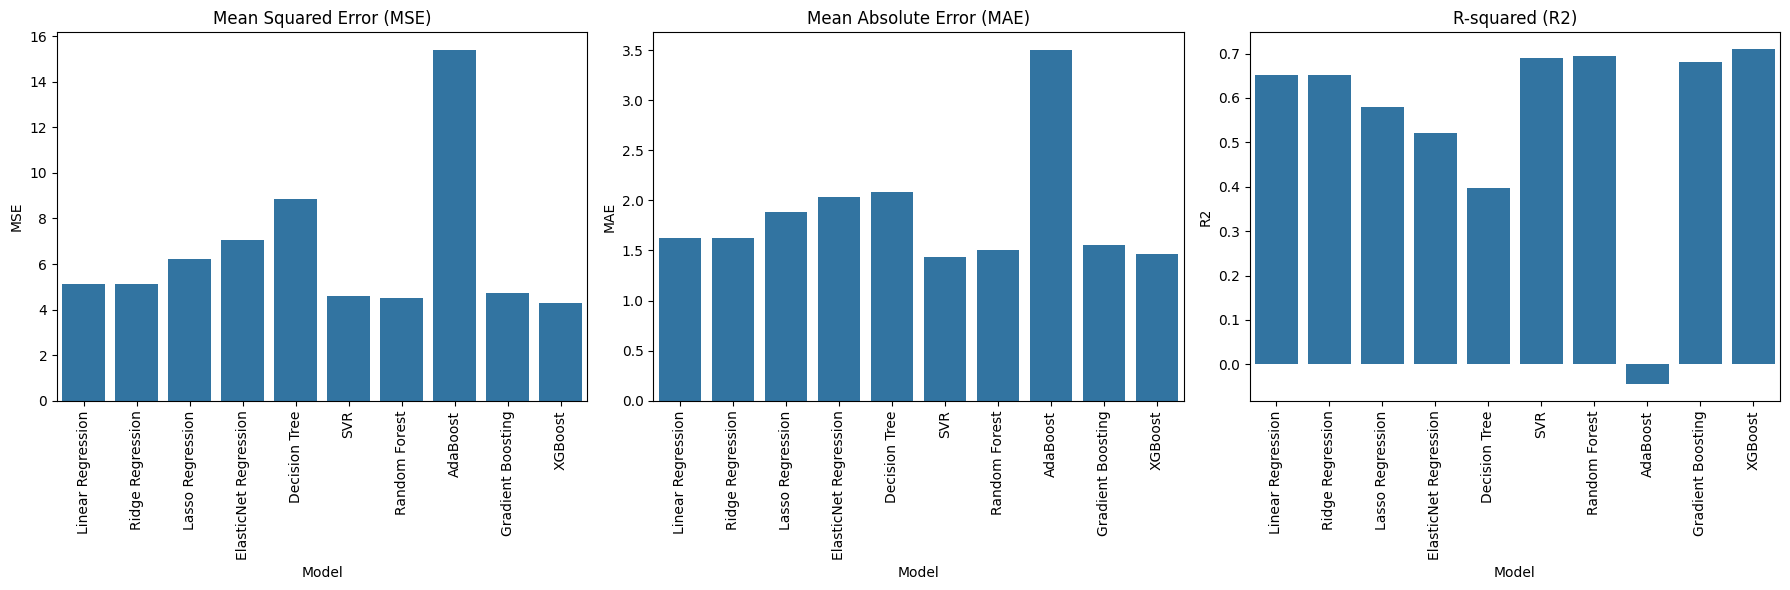

In [77]:
# Visualization of performance metrics
plt.figure(figsize=(18, 6))

# Plot MSE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.xticks(rotation=90)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plot MAE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.xticks(rotation=90)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')

# Plot R-squared
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=results_df)
plt.xticks(rotation=90)
plt.title('R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

In [78]:
import pickle

# Assuming best_model is your trained XGBRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Save the model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)
